Solving a scaled version of the Multi-Armed Bandits Problem

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random #needed for the betavariate function

### Importing the simulation dataset 

In [3]:
dataset = pd.read_csv("Ads_CTR_Optimisation.csv")
dataset

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0
7,1,1,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0


situation description :- <br>
dataset represents records of responses of the advertisements of a product on a social network;
1 is a click on the advert and 0 is the advert being ignored.<br>
CTR = click through rate

the columns represent 10 versions of the same ad<br>
if the user (represented on a row) clicks on an ad, we get a reward of 1 and if no, we don't get any reward

This is not known to us while implementing the model

final goal is the maximise the reward


### Random selection implementation 

the code for selecting a version of the ad randomly

In [4]:
import random
N = 10000
d = 10
ads_selected = []
total_reward = 0
for n in range(0, N):
    ad = random.randrange(d)
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    total_reward = total_reward + reward

In [6]:
total_reward

1227

This is our base comparison model:- if the ads are selected randomly for a user 

will be comparing this to our Thompson Sampling model for an idea how the model balances between exploration and exploitation to maximise reward while knowing that this is not the just good but the best choice..

###  results for a random model

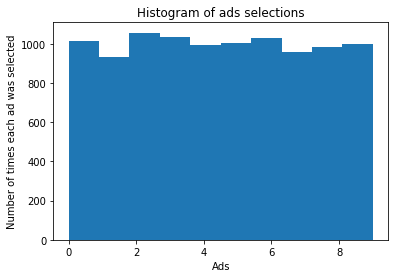

In [7]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

### Implementing the Thompson Sampling Algorithm 

this is the algorithm summary

<img src="Thompson_Sampling_Slide.png">

N and d have already been declared in the random model

declaring the variables

In [30]:
N_O_ones = np.zeros(d)
#represents the number of ones the 
#advert has received as a reward

N_O_zeros = np.zeros(d)
# represents the number of zeros the 
# advert has received as reward

SA=[]
#vector of selected ads

total_reward=0
#need to keep a dynamic count here as we don't have 
#an intermediary vector like SOR(sum of rewards) 
#in UCB

### The math

<img src="bayesian_inf.jpg">

the law of total probability has also been used here (for a continuous random variable):-
$$ p(y) = \int p(y|\theta_i)p(\theta_i)\,d\theta_i$$

In [31]:
for n in range(0,N):
    MSV=0#the max sampled value
    ad=0#represents index of ad with 
        #max_sample value for a round
    for i in range(0,d):
        random_beta = random.betavariate(N_O_ones[i]+1,
                                         N_O_zeros[i]+1)
        if(random_beta>MSV):
            MSV = random_beta
            ad=i
    SA.append(ad)
    if(dataset.values[n,ad]):
        N_O_ones[ad]+=1
        total_reward+=1
    else:
        N_O_zeros[ad]+=1
        
        

In [32]:
total_reward

2586

Nice!!! - it did better than UCB

### Visualising the results

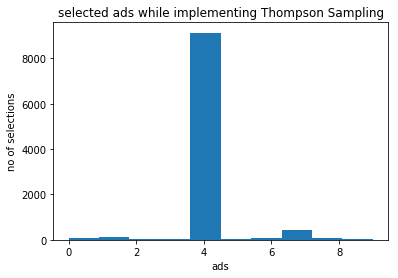

In [33]:
plt.hist(SA)
plt.title("selected ads while implementing Thompson Sampling")
plt.xlabel("ads")
plt.ylabel("no of selections")
plt.show()

and to make it clearer:-

In [34]:
SA[-10:]

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4]

so, it started exploiting the versions quicklier than UCB.